---
Material for the course "Photonics systems and devices"

Universidad de Zaragoza, Zaragoza (Spain)

The following notes written by SERGIO G RODRIGO (2021-2022)

sergut@unizar.es

---

- *Use google colab to see the Notebook index*
- *See classes and functions/methods descriptions calling name_class.__doc__; name_method.__doc__*
- *Notation and equations from "Optical Waveguide Theory", A.W. Snyder and
J. Love Springer, Boston, MA (1983) 1st Ed https://doi.org/10.1007/978-1-4613-2813-1*
- The chapters, pages, figures and tables of Snyder&Love are used to describe optical fiber parameters, field definitions, dispersion relation definitions...

# Description

The electromagnetic modes of an optical step-profile fiber can be calculated following analytical expressions in Snyder&Love, Section 12-8 Table 12-3. 

# Run with Google Colab

In [ ]:
#Your google drive is made accesible to Colab.
try:
    from google.colab import drive 
    drive.mount('/content/drive/')
    # The working directory
    %cd "/content/drive/MyDrive/optical_fiber"
    %ls -lht 
    # To import own packages set local path in packages syspath
    import sys
    sys.path.insert(0,"./")
except ImportError:
    print("You are not in google.colab!!")    
    pass

# Physics constants


In [ ]:
c0= 299792458.0 #m/s
eps0= 8.854187817e-12    #F·m-1 
mu0= 1.0/(eps0*(c0**2)) #N·A-2
con_wltoeV=1239.828330

# Auxiliary functions for plotting

In [ ]:
from OFiber_plot import plot_field_polar,\
                        plot_field_cartesian,\
                        EM_field_boundaries,\
                        plot_frac_energy,\
                        plotpolar_mode_fields


# Auxiliary functions for finding EM mode solutions

In [ ]:
from OFiber_find import find_EM_modes,\
                        find_EM_modes_loop

# Optical fiber Class (step-profile)

In [ ]:
from OFiber_class import OFiber

# Optical fiber Class (EM fields)

In [ ]:
from OFiber_fields import EMfield

#Step-profile optical fiber




### Definition of the OFiber: $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ (high index contrast waveguides)

In [ ]:
'''
Radious has been chosen so the wavelength range of operation 
for both waveguides will be the same. Therefore:
rhow=of.rho*np.sqrt(of.nco**2-of.ncl**2)/np.sqrt(ofw.nco**2-ofw.ncl**2)
print("rho for weakly guinding from high index waveguide",rhow)
'''

'''
High index contrast waveguides
(see Fig. 12-4 Snyder&Love)
'''
rho=0.2 #micras
nco=2.5
delta=0.32  
of=OFiber(rho,nco=nco,delta=delta)
# Dispersion relation V vs U file 
file_name = 'fig12-4_Snyder_Love.csv'      
of.import_dispersion_relation(file_name)
df=of.dr
print(of)

modes_dict={'HE11':['hybrid',1],'TE01':['TE',0],'HE21':['hybrid',2],
            'TM01':['TM',0],'EH11':['hybrid',1],'HE31':['hybrid',3],
            'HE12':['hybrid',1]}

# Extract column names used next
col_names=[name for name, values in df.iteritems()]
#Remove first column name 'V'
col_names.pop(0)

rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0


'V'

### Definition of the OFiber: $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ (weakly guiding waveguide -->$\Delta \lll 1$)

In [ ]:
'''
Weakly guiding waveguides
(see Fig. 14-4 Snyder&Love)
'''
rho=2.4226 #micras
ncl=1.45
delta=0.0064
of=OFiber(rho,ncl=ncl,delta=delta)
# Dispersion relation V vs U file 
file_name = 'fig14-4_Snyder_Love.csv'    
of.import_dispersion_relation(file_name)
df=of.dr
print(of)

modes_dict={'LP01':['hybrid',1],'LP11':['TE',0],'LP21':['hybrid',1],
            'LP02':['hybrid',1]}

# Extract column names used next
col_names=[name for name, values in df.iteritems()]
#Remove first column name 'V'
col_names.pop(0)

rho (microns)= 2.4226; nco= 1.4593700490391102; ncl= 1.45; $\Delta$= 0.0064;
 V-U=
           V      LP01  LP21  LP02  LP11
0  1.000000  0.000000   0.0   0.0   0.0
1  1.183673  1.123515   0.0   0.0   0.0
2  1.367347  1.244066   0.0   0.0   0.0
3  1.551020  1.344846   0.0   0.0   0.0
4  1.734694  1.429691   0.0   0.0   0.0


'V'

## Gaussian approximation

In [ ]:
import numpy as np
def Er_gaussian(rho,V):
  '''
  Gaussian aproximation: E(r)~exp(-0.5*(r/ro)**2) ro=rho/sqrt(2*ln(V))
  '''
  def er_gaussian(R,phi):
    wo=1.0*(0.65+1.619/V**(1.5)+2.879/V**6) # w/rho 0.8 < V < 2.5
    Ro=1.0/np.sqrt(2.0*np.log(V)) # Ro=ro/rho
    #print(wo/np.sqrt(2.0),Ro)
    return np.exp(-0.5*(R/Ro)**2)
  return er_gaussian

def I_gaussian(rho,V):  
  intesity=Er_gaussian(rho,V)
  def i_gaussian(R,phi):    
    return intesity(R,phi)**2
  return i_gaussian

## Electromagnetic Fields 


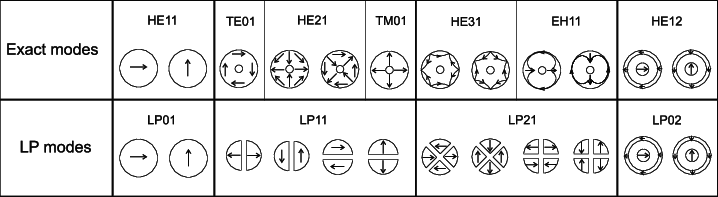

Modes available:
 rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0

Index available: 100
{'HE11': ['hybrid', 1], 'TE01': ['TE', 0], 'HE21': ['hybrid', 2], 'TM01': ['TM', 0], 'EH11': ['hybrid', 1], 'HE31': ['hybrid', 3], 'HE12': ['hybrid', 1]}

V= 2.987878788 ;U= 1.96329225

wavelength(microns)= 0.8411566536653743 beta(microns^(-1))= 15.88598182911331

Eigenvalue equation value= 2.004541255207215e-10
max= 0.1879985980849724


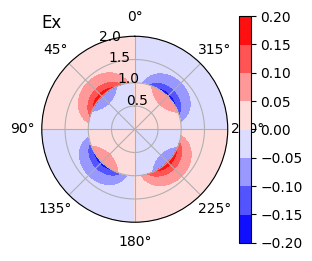

max= 1.5107930094222322


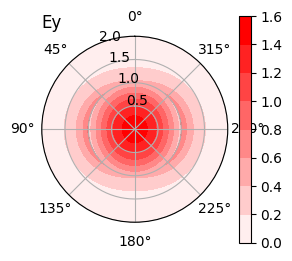

max= 0.6211018847144971


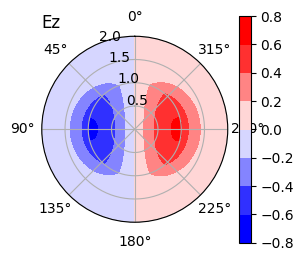

max= 1.5106028423918427


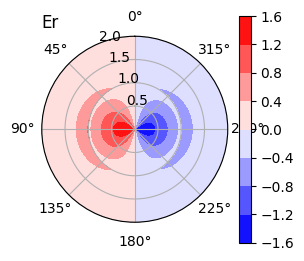

max= 1.510793009422232


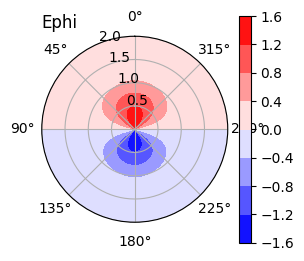

max= 0.010390787585263146


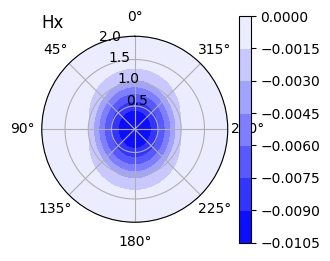

max= 0.0010632053196100572


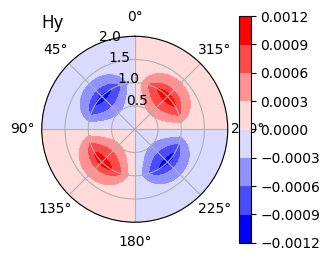

max= 0.0026263656606006036


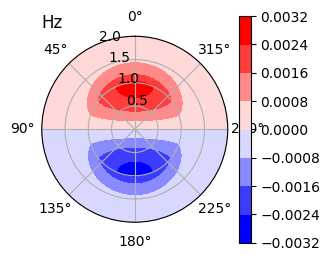

max= 0.010390787585263142


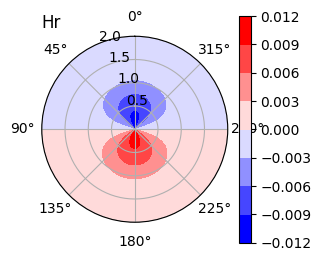

max= 0.010389479672659515


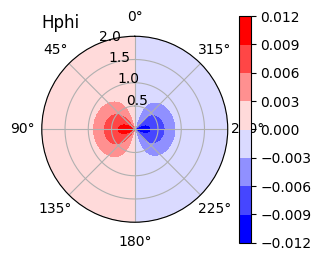

max= 0.007849164623103437


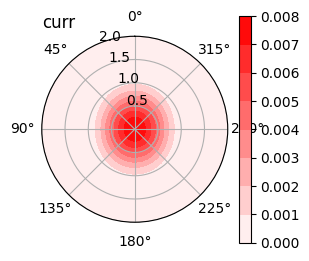

max= 0.007849164623103434


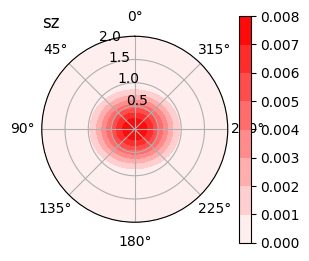

max= 1.0


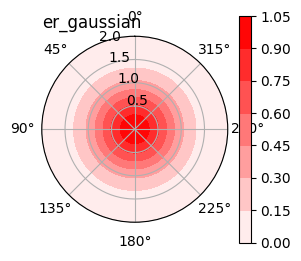

In [ ]:
from math import pi
print("Modes available:\n",of)
print("\nIndex available:",len(df['V']))

'''
# All rows and columns shown
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[1]+1)
print(df)  
'''
Rmax=2.0
field_name='HE11'
index=48
try:
  print(modes_dict)
  mode_info=modes_dict[field_name]
    
  order=mode_info[1];V=df['V'][index];U=df[field_name][index]
  print("\nV=",V,";U=",U)
  wavelength=of.lambda_from_V(V)
  beta=of.beta_from_U(U,wavelength)
  print("\nwavelength(microns)=",wavelength,"beta(microns^(-1))=",beta)
  print("\nEigenvalue equation value=",of.em_modes(mode_info[0])(U,V,order))  
  field=EMfield(U,V,order,rho=of.rho,ncl=of.ncl,delta=of.delta,mode=mode_info[0])  

  plotpolar_mode_fields(field,Rmax,E=True,H=True,Sz=True)  
  if(field_name=='LP01' or field_name=='HE11'):
     plot_field_polar(Er_gaussian(of.rho,V),Rmax)  
except:
  print("Invalidid index if V>U: V=",V,";U=",U)


### Check EM fields by $\eta$

LP01 ['hybrid', 1]
LP11 ['TE', 0]
LP21 ['hybrid', 1]
LP02 ['hybrid', 1]
Nco= 0.0063188481380331415
Ncl= 3.180133623347907e-05


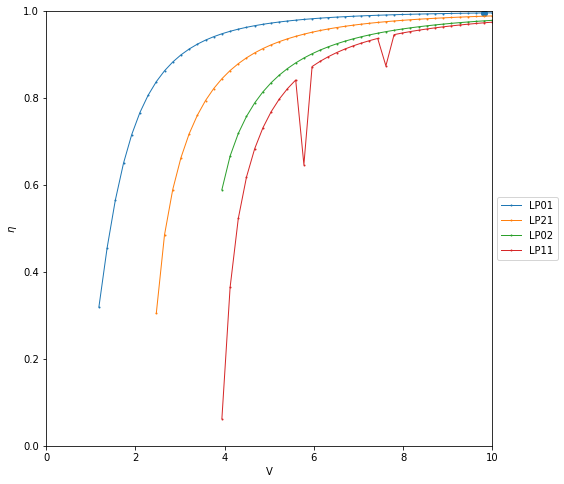

In [ ]:
frac_power=[]
for name,mode in modes_dict.items():
  print(name,mode)
  frac_power.append(of.frac_power_core(df[name],df['V'],nu=mode[1],mode=mode[0]))

frac=field.integrate_Sz(10.0,U,V,nu=mode_info[1],mode=mode_info[0],
                        nrcore=200,nrcladding=1200,nphi=400,
                        analytic=True)  
#Plot
frac_=[[V,frac]]
plot_frac_energy(df,frac_power,frac_power_fields=frac_,
                 mode_labels=col_names,Vmax=max(df['V']))

### Check the boundaries

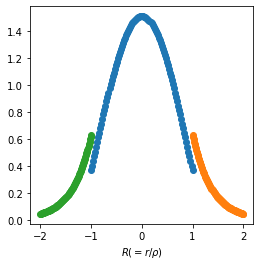

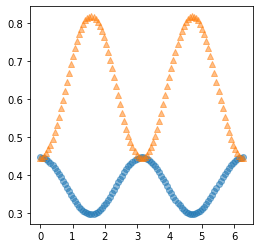

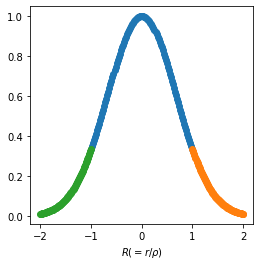

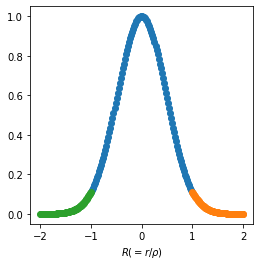

1.3298390505053344


In [ ]:
field1=field.ey()
EM_field_boundaries(field1,Rmax)
field2=Er_gaussian(of.rho,V)
EM_field_boundaries(field2,Rmax)
field3=I_gaussian(of.rho,V)
EM_field_boundaries(field3,Rmax)
print(field1(R=0.9999,phi=0.0)/field2(R=0.9999,phi=0.0))


### Modal Field Diameter (gaussian approximation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


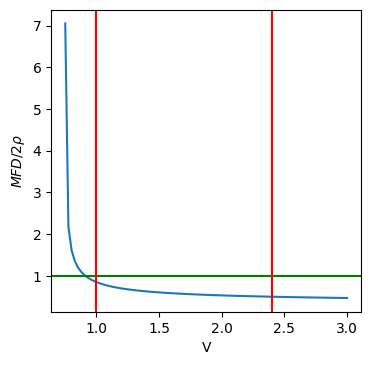

In [ ]:
import matplotlib.pyplot as plt

V_=np.linspace(0.5,3.0,100)

MFD=1.0/np.sqrt(np.log(V_))

fig, ax = plt.subplots(dpi=100,figsize=(4,4))
ax.plot(V_,MFD)
ax.axhline(y=1.0,color='g')
ax.axvline(x=1.0,color='r')
ax.axvline(x=2.405,color='r')
ax.set_xlabel('V')
ax.set_ylabel(r'$MFD/2\rho$')    
plt.show()
